In [1]:
#%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
npy_path = '../../data/courtwright/segmentations/DJI_0590.npy'

assert os.path.exists(npy_path), "Numpy file does not exist"

In [3]:
segmentation = np.load(npy_path)

print(segmentation.shape)

(3648, 5472)


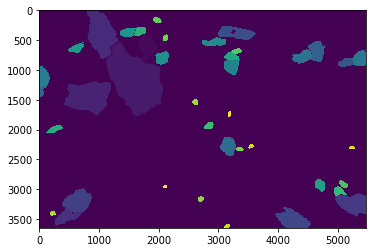

In [4]:
plt.imshow(segmentation)

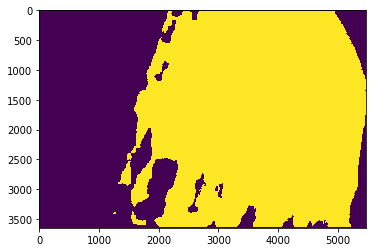

In [14]:
# display the pixels where the segmentation is 1
plt.imshow(segmentation == 0)

(3648, 5472)


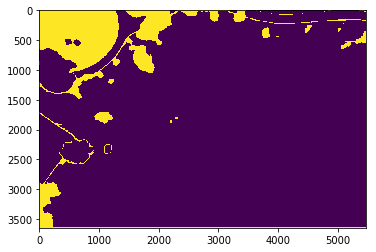

In [6]:
npy_path = '../../data/mission_2_segmentations_test/DJI_0183.npy'

assert os.path.exists(npy_path), "Numpy file does not exist"

segmentation = np.load(npy_path)

print(segmentation.shape)

plt.imshow(segmentation == -1)

(3648, 5472)


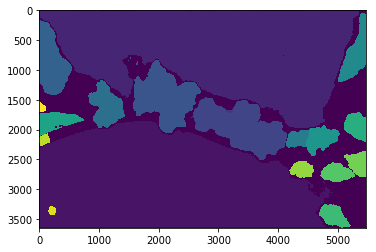

In [5]:
npy_path = '../../data/mission_2_segmentations_test/DJI_0247.npy'

assert os.path.exists(npy_path), "Numpy file does not exist"

segmentation1 = np.load(npy_path)

print(segmentation1.shape)

plt.imshow(segmentation1)

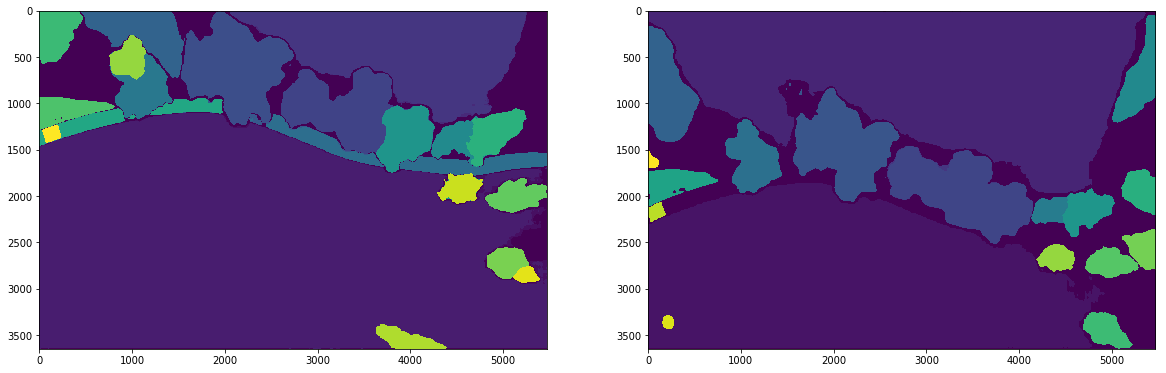

In [6]:
# show the two images horizontally
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(segmentation)
plt.subplot(122)
plt.imshow(segmentation1)
plt.show()


In [4]:
from collections import defaultdict
def group_lists(lists):
    """
    Group lists that share common elements.
    
    Parameters
    ----------
    lists : list of lists
    
    Returns
    -------
    grouped_lists : list of lists
    
    
    Example
    -------
    lists = [
        [17, 2, 3],
        [3, 4, 5],
        [5, 6, 7],
        [8, 9, 10],
        [10, 11, 2],
        [12, 13]
        ]
    grouped_lists = group_lists(lists)
    print(grouped_lists)
    [[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 17], [12, 13]]
    """
    element_to_list_map = defaultdict(list)
    for list_index, elements in enumerate(lists):
        for element in elements:
            element_to_list_map[element].append(list_index)

    # Find connected components of the list indices graph
    def dfs(list_index, visited, group):
        visited[list_index] = True
        group.append(list_index)
        for neighbour in adjacency_list[list_index]:
            if not visited[neighbour]:
                dfs(neighbour, visited, group)

    # Create an adjacency list for the graph where each node represents a list
    # and an edge connects lists that share at least one element
    adjacency_list = defaultdict(set)
    for indices in element_to_list_map.values():
        for list_index in indices:
            adjacency_list[list_index].update(indices)
            adjacency_list[list_index].remove(list_index)

    # Use DFS to find all connected components of the graph
    visited = [False] * len(lists)
    groups = []
    for list_index in range(len(lists)):
        if not visited[list_index]:
            group = []
            dfs(list_index, visited, group)
            groups.append(group)

    # Group the lists according to connected components
    grouped_lists = []
    for group in groups:
        grouped_list = set()
        for list_index in group:
            grouped_list.update(lists[list_index])
        grouped_lists.append(sorted(grouped_list))

    return grouped_lists


In [9]:
object_manager = {0:[],1:[],2:[]}
a = list(object_manager.values())
print(a)
group_registered_object_id_list = group_lists(a)
purge_object_id_map = dict()  # the key is the object id and the value is a list of registered object ids that need to be purged.
for group_registered_object_id in group_registered_object_id_list:
    print(group_registered_object_id)

[[], [], []]
[]
[]
[]
